# 6. 지도 학습: 분류

- 회귀(Regression) 문제: Target variable가 연속된 문제
- 분류(Classificatino) 문제: Target variabel가 class인 문제(의미가 없는 category)



## 6.1. 입력: 1차원 / 분류: 2 class

<br>   

### 6.1.1 ~  6.1.2. 문제 설정 및  클래스 분류 결과를 확률로 표현


#### 문제: 곤충 무게를 바탕으로 성별 예측하는 모델

- 입력 정보($x_{n}$) - 1차원, 곤충의 무게
- 목표 변수($t_{n}$) - 2개 class/category/label, 곤충의 성별(0 = 암컷 / 1 = 수컷)
- 데이터 개수($N$) / 표시 예
$$X = \begin{pmatrix} x_0 \\ x_1 \\ \vdots \\ x_{N-1} \end{pmatrix},   T = \begin{pmatrix} t_0 \\ t_1 \\ \vdots \\ t_{N-1} \end{pmatrix}$$


In [4]:
# (0) 필요 modeul 호출
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# (1) 데이터 생성 
np.random.seed(seed=0) # 난수 고정
X_min, X_max = 0, 2.5  # x의 최소, 최대(range) 결정(질량)
X_n = 30               # x의 개수(입력 데이터 개수)
X_col = ['cornflowerblue', 'gray']  # class별 색깔 구분을 위해 지정

X = np.zeros(X_n)                 # input data(x) array 생성
T = np.zeros(X_n, dtype=np.uint8) # target data(y) array 생성

Dist_s = [0.4, 0.8]               # 암컷 데이터(y = 0) 분포의 폭
Dist_w = [0.8, 1.6]               # 수컷 데이터(y = 1) 분포의 폭
Pi = 0.5                          # 클래스 0의 비율

for n in range(X_n):
    wk = np.random.rand()         # 0과 1 사이 random 생성 (무작위) - 임계값 
    T[n] = 0 * (wk < Pi) + 1 * (wk >= Pi)                 # 임계값 < 0.5 -> 암컷(0) / 임계값 > 0.5 -> 수컷(1) : class 결정 후 array 저장
    X[n] = np.random.rand() * Dist_w[T[n]] + Dist_s[T[n]] #  x 데이터 분포 array 저장
    
# (2) 데이터 확인
print('X=' + str(np.round(X, 2))) # x 데이터 확인(곤충 질량) 
print('T=' + str(T))

X=[1.94 1.67 0.92 1.11 1.41 1.65 2.28 0.47 1.07 2.19 2.08 1.02 0.91 1.16
 1.46 1.02 0.85 0.89 1.79 1.89 0.75 0.9  1.87 0.5  0.69 1.5  0.96 0.53
 1.21 0.6 ]
T=[1 1 0 0 1 1 1 0 0 1 1 0 0 0 1 0 0 0 1 1 0 1 1 0 0 1 1 0 1 0]


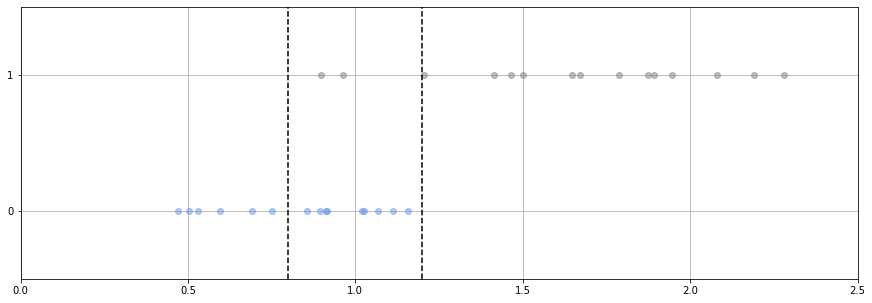

In [5]:
# 데이터 분포 시각화 함수
def show_data1(x, t):
    K = np.max(t) + 1 # class 개수
    
    for k in range(K):  
        # class별로 시각화(색깔로 구분)
        plt.plot(x[t == k], t[t == k], X_col[k], alpha=0.5, linestyle='none', marker='o') 
        
        # 부가적인 내용 설정 
        plt.grid(True)         # grid 생성
        plt.ylim(-.5, 1.5)     # plot 시각화 y 범위
        plt.xlim(X_min, X_max) # plot 시각화 x 범위
        plt.yticks([0, 1])     


# Visualization function(show_data1) 호출 후 시각화
fig = plt.figure(figsize=(15, 5))
show_data1(X, T)
plt.plot([0.8, 0.8], [-.5, 1.5], color='k', linestyle='--')
plt.plot([1.2, 1.2], [-.5, 1.5], color='k', linestyle='--')
plt.show()

- 암컷: 0.4 ~ 1.2 균일한 분포에서 질량 Sampling / 수컷이: 0.8 ~ 2.4의 균일한 분포에서 질량 Sampling

#### 결정 경계(boundary decision)
- 분류(Classfication)에서의 class를 분류하는 경계선
- 수컷과 암컷을 분리하는 경계선을 결정(if 새로운 질량 데이터 < 결정경계 "암컷" else "수컷")

[1] 선형 회귀 모델 경우
- 클래스를 0과 1의 값으로 해석하여 데이터의 분포에 직선을 맞추는 것
- 직선이 0.5의 값을 갖는 곳을 결정 경계 선택
- 질량이 충분히 커서 확실하게 수컷으로 판정할 수 있는 데이터 점 -> 직선이 데이터 점에 겹쳐져 있지 않기 때문에 오차가 발생  
(오차를 해소하려는 힘으로 결정 경계가 수컷 쪽으로 쏠리는 경향)

[2] 확률 추정(분포 정보에서의 해석적인 방법 계산)
- `질량 x< 0.8g`: 곤충 암컷 100 % / `질량 1.2g < x`: 곤충 수컷 100 %  / `질량 x 0.8g < x <1.2g`: 100% 분류는 못함
- `질량 x 0.8g < x <1.2g`인 경우 모호하게 분류 가능(수컷인 확률은 1/3)
- 이 때 조건부 확률로 표현이 가능
- 데이터의 실제 분포를 알고 있다는 특수한 상황을 가정만 가능. 하지만 현실 상황에서는 실제 분포는 알 수 없으므로 추정 대상이 됨

#### 조건부 확률(참고사항)
- 한 사건이 일어났다는 전제 하에서 다른 사건이 일어날 확률
- 수식(예): 사건 A가 발생했다는 전제, 사건 B가 발생할 확률

$$ P(A|B) =\frac{P(A \cap B)}{P(B)} $$


#### 본 문제의 조건부 확률 적용

- (책에서의 문제) 모호성 확률로 포함할 예측을 조건부 확률로 표현이 가능 -> x에 대해 t=1(수컷)일 확률은 조건부 확률로 나타낼 수 있음

$$ P(t = 1|x)$$


- 조건부 확률: x의 함수 / 모든 x에 대한 시각화 결과는 계단 그래프(클래스 분류의 답)  
- 클래스 분류가 명확하게 예측할 수 없는 영역에 대해서 확률적(조건부 확률)로 나타냄  
- 해당 방법은 불확실한 확률(모호성 확률)을 표현할 수 있다는 점에서 상대적으로 선형 회귀 모델에 의한 직선 fitting보다는 우수  
- 결정 경계의 경우 우측을 수컷 / 좌측을 암컷으로 예측할 때 확률이 높아지는 점, 즉 $ P(t=1|x)=0.5 $가 되는 x(이 예, 1.2)가 결정 경계로 선택

### 1.3. 최대 가능도법

#### 가능도: 어떤 특정 값을 관측할 때, 관측치가 어떠한 확률 분포에서 나왔는가 관한 값(확률 분포를 추정)
- 연속형 확률변수에서의 확률과는 개념적으로 반대되는 지표
<br>

- 확률: 관측값 또는 관측구간이 주어진 확률 분포 안에서 얼마만큼 나타날 수 있는가) / 확률 분포를 고정, 관측치(혹은 관측 구간) 표현한 것

    [1] 이산형 확률 변수의 경우
        - 관측치(확률 변수) 대응되는 확률값, 특정 관측치에 관해 확률값을 구함
        - 특정 관측치가 일어날 확률을 비교하는 것이 가능(확률과 우도의 개념적 차이가 없는 이유)
    
    [2] 연속형 확률 변수의 경우
        - 일정 구간(예: weight 20 and 30 사이)을 정한뒤, 확률밀도함수(Probabiliyt Deensity Function) 넓이로 확률 값이 주어짐
        - 특정 관측치에 관한 확률값이 0으로 측정됨(연속형 확률 변수의 경우 -> 특정 관측치가 일어날 가능성을 비교하기 어려움)
        - 위와 같은 한계를 해결해 주는 개념
        - 특정 관측치에 관한 확률값이 0인 이유는 다음과 같음
        

- 고정된 관측값이 어떠한 확률분포에서 어느 정도의 확률로 나타내는지에 대학 확률
- 확률밀도함수의 경우 아래와 같은 모양의 그래프(특정 구간의 넓이를 계산하여 얻는 확률, 연속형 화가률 변수의 특정 값 확률은 모두 0)
- 특정한 관측치(ex:30)에 관해서 대응되는 확률밀도함수의 값(0.2)이 높아지면 우도가 높아진다고 표현 -> 특정 관측치에 대한 확률밀도 함수의 값을 비교함으로써 어떤 확률 밀도함수를 선택하는 지 기준이 됨

![likelihood](https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2FbRdn8I%2FbtqygjgwmCA%2FCYFaWXLhykfcGSfqXYYoq0%2Fimg.png)

#### 최대 가능도법(Maximum Likelihood Estimation, MLE):  주어진 입력 데이터 x에 대해 바레 데이터 x가 생성될 확률(가능도)이 가장 커지는 w를 추정치로 한다.
- 주어진 표본에 대해 가능도를 가장 크게 하는 모수 θ를 찾는 방법

------ 

#### <본 문제의 해당 방법을 적용>
- x가 0.8 < x <= 1.2의 범위에 있는 t에 주목 -> 처음 3회는 t=0 이며, 4회째는 t=1이었다고 정의 후 $P(t=1|x)$ 추정

$$P(t = 1|x) = w$$

- 확률 w에서 t = 1을 생성하는 모델
- t = 0  확률: 1 - w   /   t = 1 확률: w (0 < w <1)  

[1] T = 0, 0, 0, 1 데이터를 생성하였다고 가정: 모델에서 클래스 데이터 T = 0, 0, 0, 1이 생성될 학률을 가능도(우도)

$$ P(T=0,0,0,1|x)= (1-w)(1-w)(1-w)w $$

- w의 값을 대입하여 확률적으로 계산 가능
- 해석적으로 찾으면 $P(T = 0,0,0,1|x) = (1 - w)^3w$의 식 되고, 위로 솟은 산 형태
<br>

>>  식이 최대가 되는 W가 최대가능도법(W= 0.25)

<br>

-  연속된 곱셈을 다루기 쉽게 log를 취함(log: 곱셈 -> 덧셈화) 
- log는 단조 증가하기 떄문에 함수 확률(P)을 최대로 만드는 w와 logP를 최대로 만드는 w로 바뀌지 않음(로그 가능도)
- 로그 가능도의 경우는 해당 값을 최대화 하는 매개 변수를 찾으면 됨(평균 제곱 오차 함수: 최소화하는 매개 변수)

$$log P = log\{(1-w)^3w\} = 3log(1-w) + logw$$

- 매개 변수에서 목적함수(w)로 편미분한 식에서 0이 되는 값을 찾으면 됨(풀이 과정)

$$\frac{\partial}{\partial w} log P = \frac{\partial}{\partial w}[3 log(1-w) + log w ] =0 $$

$$\frac{-3w +1 -w}{(1-w)w} = 0 $$ 

$$ -3w +1 -w = 0$$

$$ w = \frac{1}{4}$$

### 1.4. Logistic Regression Model

#### 로지스틱 회귀 모델 

- 회귀를 사용하여 데이터가 어떤 범주에 속할 확률을 0에서 1 사이의 값으로 예측하고 그 확률에따라 가능성이 더 높은 범주에 속하는 것으로 분류해주는 지도 학습 알고리즘(연속형 값 -> 0과 1사이의 연속형 값으로 변환 / 확률 변환 가능)
- sigmoid function이라고 불림
- 수식 
$$ y = w_0x + w_1$$
$$ y = \sigma(w_0x + w_1) = \frac{1}{1+exp\{-(w_0x+w_1)\}}$$

<br>  

- 큰 양의 출력은 1에 가까운 값 / 절대값이 큰 음의 출력은 -0에 가까워져 -> 0~1 범위의 들어감
- 회귀식을 사용하기 때문에 회귀가 ㅏ명칭에 포함 / but 데이터가 어떤 범주에 속할 확률을 y값으로 제출하여서 확률에 따라 class 포함할 가능성이 높은 곳으로 (boundary decision에 따라서) 분류해주는 지도 학습 알고리즘
- 일반적으로 0.5을 boundary decision이지만, 문제에 따라서 이 경계 값(임계값)을 변경해줌

-----
#### <Logistic Regression Model을 통해서>

로지스틱 회귀 모델을 통해 x가 t = 1 확률:  $y = \sigma(w_0x + w_1) = P(t=1|x)$


##### [1] 최대 가능도법을 활용함
- 이전에서 특정 데이터 4개 이외에도 대응할 수 있는 일반화할 수 있는 방식 구함
- 모델에서 생성된 확률, 가능도를 구하기 위한 식  
    -> $ P(t==1|x) = y / P(t==0|x) = 1-y  $ (수컷이 확률 y로)

$$ P(t|x) = y^t(1-y)^{1-t} $$

##### [2] 데이터 N개 일경우
- 하나데이터 생성 확률 -> 모든 데이터에 곱함

$$P(T|X) = \prod_{n=0}^{N-1} y_n^{t_n}(1-y_n)^{1-t_n}$$

#### [3] log 가능도를 얻음
- log 가능도가 최대가 되는 매개변수를 찾음

$$logP(T|X) = \sum_{n=0}^{N-1} \{t_n log y_n + (1-t_n)log(1-y_n)\}$$

##### [4] 오차값이 최소가 되도록 식 변형
- 위의 식에서 -1를 곱하여 교차 엔트로피 오차 생성 / N으로 나눈게 평균 교차 엔트로피
- 평균 교차 엔트로피: 데이터 개수의 오차 값의 영향이 적어짐 / 수치 확인이 파악 및 해석 용이 

$$E(w) = -\frac{1}{N}logP(T|X) = -\frac{1}{N} \sum_{n=0}^{N-1} \{t_n log y_n + (1-t_n)log(1-y_n)\}$$

1.25

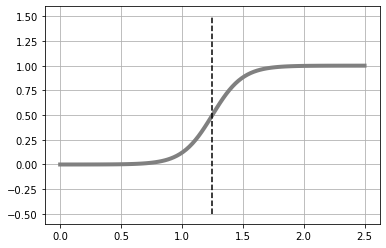

In [6]:
# Logistic Regression Model 정의
def logistic(x, w):
    y = 1 / (1 + np.exp(-(w[0] * x + w[1])))
    return y

# Logistic Regression Visualization 시각화
def show_logistic(w):
    # logistic 시각화
    xb = np.linspace(X_min, X_max, 100)        # 시각화를 위해 x range를 100개로 균등하게 나눠서 표현(array)
    y = logistic(xb, w)                        # 정의된 array x, weight와 대응되는 y 결과
    plt.plot(xb, y, color='gray', linewidth=4) # x, y 시각화 
    
    # 결정 경계 시각화
    i = np.min(np.where(y > 0.5))              # y의 결정 경계 기준 index 반환
    B = (xb[i - 1] + xb[i]) / 2                # 해당 index를 기준으로 전후 평균(x의 결정 경계 확인)
    
    plt.plot([B, B], [-.5, 1.5], color='k', linestyle='--') # 결정 경계 시각화
    plt.grid(True)
    return B

# test 결과
W = [8, -10]     # weight vector 입력 
show_logistic(W) # 시각화

### 1.5. 교차 Entropy Error

#### Entropy: 정보의 불확실성
- Entropy가 클수록 -> 사건에 대한 확률이 낮음

#### 교차 엔트로피 오차: 실제 확률 분포 Q / 추정하고자 하는 확률 분포 P
$$H(P,Q) = -\sum_{x}P(X)log_2Q(X) \\ = -\sum_{x}P(X)log_2P(X) +\sum_{x}P(X)log_2P(X) -\sum_{x}P(X)log_2Q(X) \\ = H(P) -\sum_{x}P(X)log_2\frac{P(X)}{Q(X)} $$


In [7]:
# 평균 교차 Entropy error
def cee_logistic(w, x, t):   
    y = logistic(x, w)       # 특증 Parameter(weight) Logistic regression 결과(y)
    cee = 0                  # 오차 초기화(0) 
    
    for n in range(len(y)):
        cee = cee - (t[n] * np.log(y[n]) + (1 - t[n]) * np.log(1 - y[n])) # 위에서 정의한 E(w)로 loss error 계산
    cee = cee / X_n          # Cross entropy 평균 계산
    return cee

# test 결과 
W=[1,1]
cee_logistic(W, X, T)

1.0288191541851066

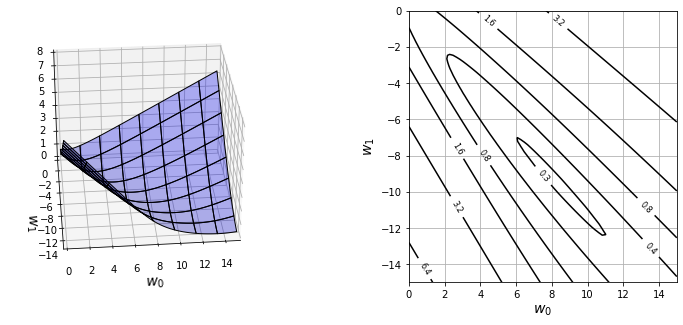

In [8]:
from mpl_toolkits.mplot3d import Axes3D

xn = 80                                             # 등고선 표시 해상도
w_range = np.array([[0, 15], [-15, 0]])             # w0와 w1의 데이터 범위 Matrix
x0 = np.linspace(w_range[0, 0], w_range[0, 1], xn)  # 등고선 표시 해상도만큼 x0 생성(x0 범위에서 균등한 범위)
x1 = np.linspace(w_range[1, 0], w_range[1, 1], xn)  # 등고선 표시 해상도만큼 x0 생성(x0 범위에서 균등한 범위)
xx0, xx1 = np.meshgrid(x0, x1)                      # grid 생성(시각화 용)
C = np.zeros((len(x1), len(x0)))                    # grid의 동일한 크기의 Crossentropy error 저장할 metrix 생성
w = np.zeros(2)                                     # weight array 생성

for i0 in range(xn):                               # 각 weight 별 crossentropy error 변화율 저장 
    for i1 in range(xn):
        w[0] = x0[i0]
        w[1] = x1[i1]
        C[i1, i0] = cee_logistic(w, X, T)           # 행별 : w1의 변화 / 열별: w0 변화

plt.figure(figsize=(12, 5))
plt.subplots_adjust(wspace=0.5)

# 로지스틱 회귀 모델의 평균 교차 엔트로피 오차 함수 3차원 시각화 
ax = plt.subplot(1, 2, 1, projection='3d')
ax.plot_surface(xx0, xx1, C, color='blue', edgecolor='black', rstride=10, cstride=10, alpha=0.3) # x: x0, y: x1, z: error 시각화
ax.set_xlabel('$w_0$', fontsize=14)  # 시각화 보조 코드(label, range, 3차원 시각 방향)
ax.set_ylabel('$w_1$', fontsize=14)
ax.set_xlim(0, 15)
ax.set_ylim(-15, 0)
ax.set_zlim(0, 8)
ax.view_init(30, -95)

# 로지스틱 회귀 모델 오차 함수 등고선 시각화
plt.subplot(1, 2, 2)
cont = plt.contour(xx0, xx1, C, 20, colors='black',levels=[0.26, 0.4, 0.8, 1.6, 3.2, 6.4]) # 등고선 표현 선
cont.clabel(fmt='%1.1f', fontsize=8)  # 시각화 보조 코드(label, grid, font 크기)
plt.xlabel('$w_0$', fontsize=14)
plt.ylabel('$w_1$', fontsize=14)
plt.grid(True)
plt.show()

### 1.6 학습 규칙 도출

- 교차엔트로피 오차를 최소화하는 매개 변수의 분석해는 구할 수 없음: 비선형 sigmoid 함수를 포함  
    -> 비선형함수면 분석해를 구할 수 없는 이유 찾기(궁금증)
<br>

- 경사 하강법을 사용하여 수치적 해를 구하는 방식(매개변수를 편미분) 하는 방향

#### [1] 교차 Entropy Error를 각각의 paramter로 편미분
- $E_n(w)$를 $w_0$로 편미분

$$y_n = \sigma(a_n) = \frac{1}{1+exp(-a_n)}$$

$$a_n = w_0x_n + w_1$$

$$E(w) = \displaystyle\sum_{n=0}^{N-1}{(t_n\log y_n + (1-t_n)log(1-y_n)}$$

#### [2] 연쇄 법칙 활용: $E_n(w)$는 중첩된 함수
$$\frac{\partial E_n}{\partial w_0} = \frac{\partial E_n}{\partial y_n}  \frac{\partial y_n}{\partial a_n}  \frac{\partial a_n}{\partial w_0}$$

1. $\frac{\partial E_n}{\partial y_n} = -\frac{t_n}{y_n} + \frac{1-t_n}{1-y_n}$

2. $\frac{\partial y_n}{\partial a_n} =\sigma(a_n)\{1-\sigma(a_n)\} = y_n(1-y_n)$

3. $\frac{\partial a_n}{\partial w_0} = x_n$

위에서 구한 연쇄 법칙 결과를 곱하면 다음과 같음


w0의 편미분: $$\frac{\partial E_n}{\partial w_0} = \frac {1}{N}\displaystyle\sum_{n=0}^{N-1} \{-t_n(1-y_n) + (1-t_n)y_n)\}x_n = \frac {1}{N}\displaystyle\sum_{n=0}^{N-1}(y_n-t_n)x_n$$
w1의 편미분:  $$\frac{\partial E_n}{\partial w_1} = \frac {1}{N}\displaystyle\sum_{n=0}^{N-1}(y_n - t_n)$$

In [9]:
# 평균 Cross Entropy Error 미분
def dcee_logistic(w, x, t):
    y = logistic(x, w)
    dcee = np.zeros(2)      # 각 Parameter를 저장할 array 생성 
    
    for n in range(len(y)): # 데이터 개수만큼 반복해 미분 
        dcee[0] = dcee[0] + (y[n] - t[n]) * x[n] # E의 w0 편미분 공식 표현: (Yn - Tn) Xn 
        dcee[1] = dcee[1] + (y[n] - t[n])        # E의 w1 편미분 공식 표현: (Yn - Tn)
    dcee = dcee / X_n                            # 데이터 개수만큼 나눠 평균 구함
    return dcee

# test 
W=[1, 1]
dcee_logistic(W, X, T)

array([0.30857905, 0.39485474])

###  1.7. 경사하강법에 의한 해

- 경사하강법으로 logistic regression 매개 변수 찾음(library 내부의 함수로 시도 진행 -> 편리)

#### scipy.optimize.minimize(fun, x0, args=(), method=None, jac=None)
- fun: 목적 함수
- x0 : 초기값
- args : 데이터
- method: 사용할 알고리즘(솔버)를 나타내는 문자
- jac:: 목적함수의 자코비언, 헤시안, 헤시안과 임의 벡터의 곱. 사용하는 알고리즘에 따라 필요할 수도, 필요하지 않을 수도 있음

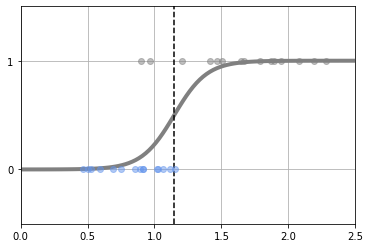

w0 = 8.18, w1 = -9.38
CEE = 0.25
Boundary = 1.15 g


In [10]:
# 경사 하강법으로 Logistic Regression Model 최적화된 매개 변수 찾는 모듈 
from scipy.optimize import minimize


# 매개 변수 검색
def fit_logistic(w_init, x, t):
    
    # 입력 목적 함수(교차 엔트로피)의 경사하강법을 통한 추정 매개 변후 
    res1 = minimize(cee_logistic, w_init, args=(x, t),jac=dcee_logistic, method="CG") # 함수 요소는 위의 서술
    return res1.x


W_init=[1,-1]                  # 매개변수 초기값 설정(w0 = 1, w1 = -1)
W = fit_logistic(W_init, X, T) # 최적의 매개 변수 탐색 및 결과 저장
B = show_logistic(W)           # 해당 결과값 시각화 
show_data1(X, T)               # 실제 데이터 확인

# 시각화 
plt.figure(1, figsize=(10, 5))
plt.ylim(-.5, 1.5)
plt.xlim(X_min, X_max)
cee = cee_logistic(W, X, T)
plt.show()

# 결과 정리(print)
print("w0 = {0:.2f}, w1 = {1:.2f}".format(W[0], W[1]))  # 최적의 매개 변수 
print("CEE = {0:.2f}".format(cee))                      # 최소화된 오차 값
print("Boundary = {0:.2f} g".format(B))                 # boundary x 값ㅌ

#### 결과
-  결정 경계는 1.15g vs 직선 모델 피팅했을 때 (1.24g): 약간 왼쪽으로 돌아옴

#### 결론: 이 모델의 가장 큰 장점 출력 값이 P(t = 1|x)라는 조건부 확률을 근사하려는 점이며, 모호성을 포함하여 예측하는 것

## 2. 2차원 입력 2클래스 분류 

### 2.1. 문제 설정

- 2차원 입력 데이터로 재설정
- X: 입력 데이터는 N x 2
- T2: 2클래스 분류의 클래스 데이터는 N x 2
- T3: 3클래스 분류 클래스 데이터는 N x 3
- 1-of-K 부호화(One-hot-encoding): 목적 변수 벡터 $t_n$ 의 k 번째 요소만 1로, 그 외에는 0으로 표기하는 방법 

#### 데이터 생성 원리
- 어떤 클래스에 소속하는 확률 Pi = np.array([0.4,0.8,1])설정
- 0~1 사이의 균일한 분포에서 난수를 생성
- Pi[0] 보다 작으면 클래스 0, Pi[1]보다 작으면 클래스 1, Pi[2]보다 작으면 2
- 클래스가 결정된 뒤, 클래스마다 각각 다른 가우스 분포로 입력 데이터 생성

In [11]:
%reset   # 데이터 재설정 여부

Once deleted, variables cannot be recovered. Proceed (y/[n])? y
Don't know how to reset  #, please run `%reset?` for details
Don't know how to reset  데이터, please run `%reset?` for details
Don't know how to reset  재설정, please run `%reset?` for details
Don't know how to reset  여부, please run `%reset?` for details


In [12]:
# (0) 필요 modeul 호출
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# (1) 데이터 생성 
np.random.seed(seed=0) # 난수 고정
X_min, X_max = 0, 2.5  # x의 최소, 최대(range) 결정(질량)
X_n = 30               # x의 개수(입력 데이터 개수)
X_col = ['cornflowerblue', 'gray']  # class별 색깔 구분을 위해 지정

X = np.zeros(X_n)                 # input data(x) array 생성
T = np.zeros(X_n, dtype=np.uint8) # target data(y) array 생성

Dist_s = [0.4, 0.8]               # 암컷 데이터(y = 0) 분포의 폭
Dist_w = [0.8, 1.6]               # 수컷 데이터(y = 1) 분포의 폭
Pi = 0.5                          # 클래스 0의 비율

for n in range(X_n):
    wk = np.random.rand()         # 0과 1 사이 random 생성 (무작위) - 임계값 
    T[n] = 0 * (wk < Pi) + 1 * (wk >= Pi)                 # 임계값 < 0.5 -> 암컷(0) / 임계값 > 0.5 -> 수컷(1) : class 결정 후 array 저장
    X[n] = np.random.rand() * Dist_w[T[n]] + Dist_s[T[n]] #  x 데이터 분포 array 저장
    
# (2) 데이터 확인
print('X=' + str(np.round(X, 2))) # x 데이터 확인(곤충 질량) 
print('T=' + str(T))

X=[1.94 1.67 0.92 1.11 1.41 1.65 2.28 0.47 1.07 2.19 2.08 1.02 0.91 1.16
 1.46 1.02 0.85 0.89 1.79 1.89 0.75 0.9  1.87 0.5  0.69 1.5  0.96 0.53
 1.21 0.6 ]
T=[1 1 0 0 1 1 1 0 0 1 1 0 0 0 1 0 0 0 1 1 0 1 1 0 0 1 1 0 1 0]


In [13]:
# (0) 필요 modeul 호출
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


# (1) 데이터 생성 
np.random.seed(seed=1)  # 난수를 고정
N, K = 100, 3           # 데이터와 분포 설정

T3 = np.zeros((N, 3), dtype=np.uint8)  # 2 Classification array 생성
T2 = np.zeros((N, 2), dtype=np.uint8)  # 3 Classification array 생성
X = np.zeros((N, 2))                   # 입력 데이터 array(2 dimension)
X_range0, X_range1 = [-3, 3], [-3, 3]  # X0, X1 범위 

Mu = np.array([[-.5, -.5], [.5, 1.0], [1, -.5]])  # 분포의 중심
Sig = np.array([[.7, .7], [.8, .3], [.3, .8]])    # 분포의 분산
Pi = np.array([0.4, 0.8, 1])                      # 각 분포에 대한 비율 0.4 0.8 1(값에 따라 해당 비율에 포함되냐 따라서 class 결정)

for n in range(N):
    wk = np.random.rand()                         # 난수 생성
    for k in range(K): 
        if wk < Pi[k]:                            # 난수 결과가 분포에 대한 비율에 따라서 class 정의
            T3[n, k] = 1                          # 결과값 < 0.4, class = 0, 결과값 < 0.8, class = 1, else 2
            break
            
    for k in range(2):                            # 얻은 결과값의 분포를 계산하여 X 생성
        X[n, k] = (np.random.randn() * Sig[T3[n, :] == 1, k] + Mu[T3[n, :] == 1, k])

# 2 class 생성했을 때와 3 class 생성했을 때 결과값을 맞춰줌
T2[:, 0] = T3[:, 0]
T2[:, 1] = T3[:, 1] | T3[:, 2]

# 내용 확인(print)
print('입력 데이터 확인: \n', X[:5,:])
print('\n')
print('2 class 구분 예시: \n', T2[:5,:])
print('\n')
print('3 class 구분 예시: \n', T3[:5,:])

입력 데이터 확인: 
 [[-0.14173827  0.86533666]
 [-0.86972023 -1.25107804]
 [-2.15442802  0.29474174]
 [ 0.75523128  0.92518889]
 [-1.10193462  0.74082534]]


2 class 구분 예시: 
 [[0 1]
 [1 0]
 [1 0]
 [0 1]
 [1 0]]


3 class 구분 예시: 
 [[0 1 0]
 [1 0 0]
 [1 0 0]
 [0 1 0]
 [1 0 0]]


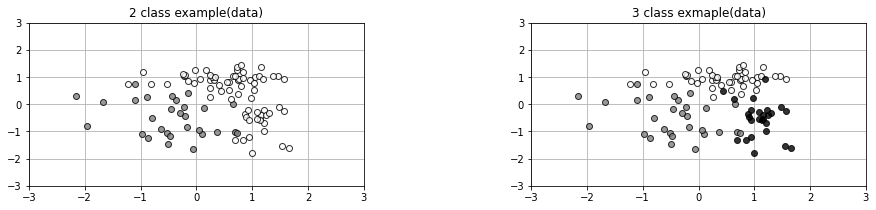

In [14]:
## 데이터 분포 시각화 함수
def show_data2(x, t):
    wk, K = t.shape
    c = [[.5, .5, .5], [1, 1, 1], [0, 0, 0]]   # class별 구분하기 위한 색깔 지정
    for k in range(K):                         # class 개수만큼 반복 / 각각의 class(x0, x1)를 표시후 색깔로 구분
        plt.plot(x[t[:, k] == 1, 0], x[t[:, k] == 1, 1],linestyle='none', markeredgecolor='black', marker='o', color=c[k], alpha=0.8)
        plt.grid(True)

# 2 class / 3 class에 대한 시각화
plt.figure(figsize=(15, 3))
plt.subplots_adjust(wspace=0.5)   # 각 plot의 열 사이 지정

## 2 class exmaple
plt.subplot(1, 2, 1)
show_data2(X, T2)
plt.xlim(X_range0)
plt.ylim(X_range1)
plt.title('2 class example(data)')

## 3 class exmaple
plt.subplot(1, 2, 2)
show_data2(X, T3)
plt.xlim(X_range0)
plt.ylim(X_range1)
plt.title('3 class exmaple(data)')

plt.show()

### 2.2 Rogistic Regression Model

- 로지스틱 회귀 모델을 확장 버전(1차원 입력 -> 2차원 입력)


$ y = \sigma(a) $

$ a = w_0x_0 + w_1x_2 + w_2 $


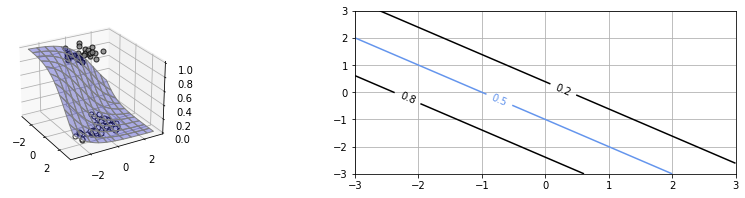

In [15]:
# Rogitic Regression Model(2차원)
def logistic2(x0, x1, w):
    y = 1 / (1 + np.exp(-(w[0] * x0 + w[1] * x1 + w[2])))
    return y

## (1) 모델과 데이터를 3D 시각화
from mpl_toolkits.mplot3d import axes3d

## 1.1 logistic mode 시각화 
def show3d_logistic2(ax, w):
    xn = 50                                         # 등고선 표시 해상도
    x0 = np.linspace(X_range0[0], X_range0[1], xn)  # 등고선 표시 해상도만큼 x0 생성(x0 범위에서 균등한 범위)
    x1 = np.linspace(X_range1[0], X_range1[1], xn)  # 등고선 표시 해상도만큼 x1 생성(x1 범위에서 균등한 범위)
    xx0, xx1 = np.meshgrid(x0, x1)                  # 시각화 위한 grid 생성
    y = logistic2(xx0, xx1, w)                      # 각각 입력 데이터와 parameter에 따른 y값 
    ax.plot_surface(xx0, xx1, y, color='blue', edgecolor='gray', rstride=5, cstride=5, alpha=0.3)

## 1.2 데이터 분포 시각화
def show_data2_3d(ax, x, t):
    c = [[.5, .5, .5], [1, 1, 1]]                   # class 구분하기 위한 새갂ㄹ 지정 
    for i in range(2):                              # class 개수(2) 만큼 반복해 서로 다른 색깔로 데이터 분포 시각화
        ax.plot(x[t[:, i] == 1, 0], x[t[:, i] == 1, 1], 1 - i, marker='o', color=c[i], markeredgecolor='black',
                linestyle='none', markersize=5, alpha=0.8)
    Ax.view_init(elev=25, azim=-30)                 # 3D 각도

# 1.3 등고선 시각화
def show_contour_logistic2(w):
    xn = 30                                         # 파라미터의 분할 수
    x0 = np.linspace(X_range0[0], X_range0[1], xn)  # 등고선 표시 해상도만큼 x0 생성(x0 범위에서 균등한 범위) 
    x1 = np.linspace(X_range1[0], X_range1[1], xn)  # 등고선 표시 해상도만큼 x1 생성(x0 범위에서 균등한 범위)
    xx0, xx1 = np.meshgrid(x0, x1)                  # grid 생성
    y = logistic2(xx0, xx1, w)                      # y 값 생성
    cont = plt.contour(xx0, xx1, y, levels=(0.2, 0.5, 0.8), colors=['k', 'cornflowerblue', 'k'])  # 등고선 생성
    cont.clabel(fmt='%1.1f', fontsize=10)
    plt.grid(True)

# 시각화
plt.figure(figsize=(15,3))
Ax = plt.subplot(1, 2, 1, projection='3d')           # 데이터 분포와 model 3D시각화
W=[-1, -1, -1]                                       # parameter 입력
show3d_logistic2(Ax, W)
show_data2_3d(Ax,X,T2)

Ax = plt.subplot(1, 2, 2)
W=[-1, -1, -1]
show_contour_logistic2(W)
plt.show()

#### 모델 평균 교차 엔트로피 오차 함수

$$E(w) = -\frac{1}{N}logP(T|X) \\ = -\frac{1}{N} \sum_{n=0}^{N-1} \{t_n log y_n + (1-t_n)log(1-y_n)\}$$ 

- 데이터베이스에는 1-of-k 부호화 사용, 
     -> 2클래스 분류 문제이므로 T의 0열째 $t_n0$를 $t_n$으로 두고 1이면 클래스 0, 0이면 클래스 1로 처리
     
#### 매개변수의 편미분

$$ \frac {\partial E}{\partial w_0} =  \frac {1}{N}\displaystyle\sum_{n=0}^{N-1} (y_n - t_n)x_0 $$

$$ \frac {\partial E}{\partial w_1} =  \frac {1}{N}\displaystyle\sum_{n=0}^{N-1} (y_n - t_n)x_1  $$

$$ \frac {\partial E}{\partial w_2} =  \frac {1}{N}\displaystyle\sum_{n=0}^{N-1} (y_n - t_n) $$

- 편미분 계산하는 함수 정의
- 실행하면 w = [-1, -1, -1]의 경우 편미분 값이 반환

In [16]:
# 2차원 데이터의 교차 Entropy Error function
def cee_logistic2(w, x, t):
    X_n = x.shape[0]                   # 데이터 개수(평균 계산 용도)         
    y = logistic2(x[:, 0], x[:, 1], w) # y 값(확률) 생성
    cee = 0                            # error 초기화
    for n in range(len(y)):            
        cee = cee - (t[n, 0] * np.log(y[n]) + (1 - t[n, 0]) * np.log(1 - y[n]))  # 각 데이터별 crossentropy error 계산
    cee = cee / X_n                    # 전체 error / 전체 데이터 개수 = 평균
    return cee

# 2차원 데이터 교차 Entropy Error 미분 function
def dcee_logistic2(w, x, t):
    X_n=x.shape[0]                     # 데이터 개수
    y = logistic2(x[:, 0], x[:, 1], w) # y 값 생성
    dcee = np.zeros(3)                 # parameter(w0, w1, w2) 미분 결과값 저장할 array 생성
    
    for n in range(len(y)):
        dcee[0] = dcee[0] + (y[n] - t[n, 0]) * x[n, 0]   # w0 편미분
        dcee[1] = dcee[1] + (y[n] - t[n, 0]) * x[n, 1]   # w1 편미분
        dcee[2] = dcee[2] + (y[n] - t[n, 0])             # w2 편미분
    dcee = dcee / X_n 
    return dcee


# 확인
W=[-1, -1, -1]            # 편미분할 weight vector
dcee_logistic2(W, X, T2)  # 결과: w0 = -1, w1 = -1, w2 = -1일떄의 편미분 결과값

array([ 0.10272008,  0.04450983, -0.06307245])

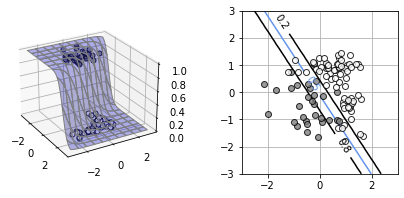

w0 = -3.70, w1 = -2.54, w2 = -0.28
CEE = 0.22


In [17]:
# 로지스틱 회귀 모델의 최적의 매개 변수 검색
from scipy.optimize import minimize

def fit_logistic2(w_init, x, t):
    res = minimize(cee_logistic2, w_init, args=(x, t), jac=dcee_logistic2, method="CG")
    return res.x


# 평균 교차 엔트로피 오차가 최소가 되는 모델의 매개 변수 결과 시각화 
plt.figure(1, figsize=(7, 3))
plt.subplots_adjust(wspace=0.5)

## 최적의 매개해 시각화
Ax = plt.subplot(1, 2, 1, projection='3d')
W_init = [-1, 0, 0]              # weight (-1, 0, 0)를 최초의 weight parameter를 기준으로 최적의 매개해 찾기 
W = fit_logistic2(W_init, X, T2)
show3d_logistic2(Ax, W)

show_data2_3d(Ax, X, T2)
cee = cee_logistic2(W, X, T2)

## 데이터를 등고선에 표현
Ax = plt.subplot(1, 2, 2)
show_data2(X, T2)
show_contour_logistic2(W)
plt.show()

## 결과 print
print("w0 = {0:.2f}, w1 = {1:.2f}, w2 = {2:.2f}".format(W[0], W[1], W[2]))
print("CEE = {0:.2f}".format(cee))

#### 결과
-  minimize()에 미분 함수도 전달하여 켤레 기울기법으로 매개변수를 구함
- 목표대로 분포를 분리하는 곳에서 결정 경계가 그려진 것을 확인(사용한 logistic regression model -> 면 모델)
- 이 면: 시그모이드 함수에 의해 0과 1 사이에 들어가는 것(모델의 결정 경계는 반드시 직선)

### 6.3 2차원 입력 3클래스 분류 

#### 3 클래스 분류 logistic regreesion model
- softmax function을 통해 3개 이상의 classification 가능

- 예) 3클래스의 분류 문제

[1] 3개의 클래스 입력 총합 $a_k$를 고려

$$a_k = w_{k0}x_0 + w_{k1}x_1 + w_{k2}$$

[2]  세번째 입력 x2 = 1를 가정하면 다음과 같음

$$a_k = \sum_{i=0}^{D}w_{ki}x_i$$

[3] 입력 총합 -> 소프트맥스 함수에 입력.

$$u = \sum_{k=0}^{K-1}exp(a_k)$$

$$y_k = \frac{exp(a_k)}{u}$$


[4] 모델의 매개변수  $w_ki$를 정리하여 Matrix로 나타낼 수 있음 
$$W = \begin{pmatrix} w_{00} & w_{10} & w_{20} \\ w_{01} & w_{11} & w_{21} \\ w_{02} & w_{12} & w_{22} \end{pmatrix}$$

[5] 주의할점
- 입력에 대한 출력의 합은 1을 보장(확률)
- 모델 출력은 각 클래스에 입력 x가 속할 확률을 나타내도록 학습해야함 


In [29]:
# 3 class logistic regression model
def logistic3(x0, x1, w):
    K = 3                 # 차원
    w = w.reshape((3, 3)) # 모델의 매개 변수(parameter)의 3 * 3 matrix 변환
    n = len(x1) 
    y = np.zeros((n, K))  # 데이터 개수 * 차원 matrix
    
    for k in range(K): 
        y[:, k] = np.exp(w[k, 0] * x0 + w[k, 1] * x1 + w[k, 2]) # 각 열별로 exp 계산 (입력 총합을 계산하기 위해)
    wk = np.sum(y, axis=1)                                       # 열별로 exp 합침(u) 생성
    wk = y.T / wk                                                # softmax 계산
    y = wk.T 
    return y


# 예시 자료(3개)
W = np.array([1, 2, 3, 4 ,5, 6, 7, 8, 9])
y = logistic3(X[:3, 0], X[:3, 1], W)
print(np.round(y, 3))

[[0.    0.006 0.994]
 [0.965 0.033 0.001]
 [0.925 0.07  0.005]]


#### 교차 엔트로피 오차

- (복습) 가능도: 모든 입력 데이터에 대한 전체 클래스 데이터 T가 생성된 확률
- (1) 클래스가 0인(T = [1,0,0])경우, 그 클래스가 생성된 확률 정의

$$P(T=[1,0,0]|X) = y_0$$

- (2) 클래스가 1(T = [0,1,0])인 경우 그 클래스가 생성된 확률 정의

$$P(T=[0,1,0]|X) = y_1$$ 

<br>


#### 1. 결론: 모든 클래스에 대해서 동일한 수식으로 표현하는 결과는 다음아래와 같음.

$$P(T|X) = y_0^{t_0}y_1^{t_1}y_2^{t_2}$$

<br>


#### 2. 모든 N개의 데이터가 생성된 확률은 모든 데이터의 확률 값의 곱임

$$P(T|X) = \prod_{n=0}^{N-1}\prod_{k=0}^{K-1}y_{nk}^{t_nk}$$

<br>


#### 3. 평균 교차 엔트로피 오차 함수 (-가능도)로 다음과 같음

$$ E(W)=-\frac{1}{N}logP(T|X) = -\frac{1}{N}\sum_{n=0}^{N-1}\sum_{k=0}^{K-1}t_{nk} log y_{nk}$$

<br>

#### 경하하강법에 의한 해
- 경사하강법으로 E(w)를 최소화하는 w -> 각 E(w)의 각 $w_ki$에 관한 편미분
- paramter(w0,w1) 초기값을 설정을 한뒤에 반복 연산 후, 새로운 paramter를 위해 현재 위치 paramter에서 Learning rate(알파)와 기울기를 뺴는 방식을 반복

$$\frac{\partial E}{\partial w_{ki}} = \frac{1}{N}\sum_{n=0}^{N-1}(y_{nk}-t_{nk})x_i$$

In [21]:
# 교차 엔트로피 함수 
def cee_logistic3(w, x, t):
    X_n = x.shape[0]                     # 
    y = logistic3(x[:, 0], x[:, 1], w)   #
    cee = 0                              #
    N, K = y.shape
    for n in range(N):
        for k in range(K):
            cee = cee - (t[n, k] * np.log(y[n, k]))
    cee = cee / X_n
    return cee

def dcee_logistic3(w, x, t):
    X_n = x.shape[0]
    y = logistic3(x[:, 0], x[:, 1], w)
    dcee = np.zeros((3, 3)) # (클래스의 수 K) x (x의 차원 D+1) : 1차원 추가한 이유 -> 3개의 매개변수(상수항 포함)
    N, K = y.shape          
    for n in range(N):
        for k in range(K):
            dcee[k, :] = dcee[k, :] - (t[n, k] - y[n, k])* np.r_[x[n, :], 1]  # 편미분 공식 화룡ㅇ해서 편미부 계산
    dcee = dcee / X_n # 평균 나눔 
    return dcee.reshape(-1)


# 오차를 최소화하는 매개 변수 검색 fucntion 
def fit_logistic3(w_init, x, t):
    res = minimize(cee_logistic3, w_init, args=(x, t), jac=dcee_logistic3, method="CG")
    return res.x

# 결과 확인
W = np.array([1, 2, 3, 4 ,5, 6, 7, 8, 9])
display(cee_logistic3(W, X, T3))           # weight arameter가 위의 처럼 정의할 때의 cross entropy 값
display(dcee_logistic3(W, X, T3))          # 이떄 편미분 값(weight별)

3.9824582404787288

array([ 0.03778433,  0.03708109, -0.1841851 , -0.21235188, -0.44408101,
       -0.38340835,  0.17456754,  0.40699992,  0.56759346])

[[-3.2  -2.69  2.25]
 [-0.49  4.8  -0.69]
 [ 3.68 -2.11 -1.56]]
CEE = 0.23


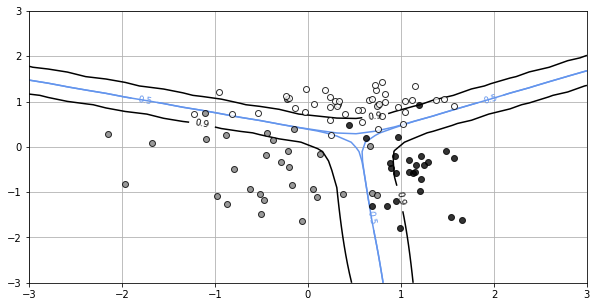

In [23]:
def show_contour_logistic3(w):
    xn = 30 # 파라미터의 분할 수
    x0 = np.linspace(X_range0[0], X_range0[1], xn)
    x1 = np.linspace(X_range1[0], X_range1[1], xn)

    xx0, xx1 = np.meshgrid(x0, x1)
    y = np.zeros((xn, xn, 3))
    for i in range(xn):
        wk = logistic3(xx0[:, i], xx1[:, i], w)
        for j in range(3):
            y[:, i, j] = wk[:, j]
    for j in range(3):
        cont = plt.contour(xx0, xx1, y[:, :, j],levels=(0.5, 0.9), colors=['cornflowerblue', 'k'])
        cont.clabel(fmt='%1.1f', fontsize=9)
    plt.grid(True)
    
W_init = np.zeros((3, 3))
W = fit_logistic3(W_init, X, T3)
print(np.round(W.reshape((3, 3)),2))
cee = cee_logistic3(W, X, T3)
print("CEE = {0:.2f}".format(cee))


plt.figure(figsize=(10, 5))
show_data2(X, T3)
show_contour_logistic3(W)
plt.show()

#### 결과
-  클래스 사이에 경계선이 잘 구분되게 형성
- 다중 클래스 로지스틱 회귀 모델에서는 클래스 간 경계선이 직선의 조합으로 구성
- 모호성을 조건부 확률로 근사하는 것이 상대적 장점


### Appendix

- 가능도: https://dlearner.tistory.com/43
- 가능도/최대가능도: https://datascienceschool.net/02%20mathematics/09.02%20%EC%B5%9C%EB%8C%80%EA%B0%80%EB%8A%A5%EB%8F%84%20%EC%B6%94%EC%A0%95%EB%B2%95.html